# 基尼系数

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
iris = datasets.load_iris()
x = iris.data[:,2:] # 保留了后两个特征
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier 
 
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)) ,
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

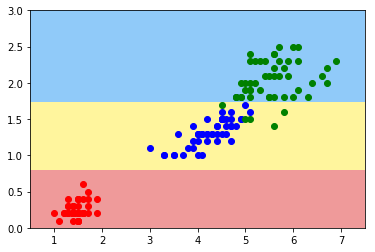

In [4]:
plot_decision_boundary(dt_clf,axis = (0.5,7.5,0,3))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.scatter(x[y==2,0],x[y==2,1],color="green")
plt.show()

# 模拟使用基尼系数划分

In [13]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d]<=value)
    index_b = (X[:,d]>value)
    return X[index_a], X[index_b],y[index_a], y[index_b]

def gini(y):
    counter = Counter(y) # 将y变成字典
    res = 1.0
    for num in counter.values():
        p = num/len(y)
        res -= p ** 2
    return res
def try_split(X,y):
    best_g = float('inf')
    best_d, best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d]) ##argsort返回排序相应的索引
        for i in range(1, len(X)):
            
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                # 候选的阈值
                v = (X[sorted_index[i-1], d] +  X[sorted_index[i], d])/ 2
                X_1, X_r, y_1, y_r = split(X,y,d,v)
                g = gini(y_1) + gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g,d,v
                
    return best_g, best_d, best_v

In [14]:
try_split(x,y)

(0.5, 0, 2.4500000000000002)

In [15]:
best_g, best_d, best_v = try_split(x,y)

In [16]:
 X1_1, X1_r, y1_1, y1_r = split(x,y,best_d,best_v)

In [17]:
gini(y1_1)

0.0

In [18]:
gini(y1_r)

0.5

In [20]:
best_entropy2, best_d2, best_v2 = try_split(X1_r,y1_r)

In [25]:
try_split(X1_r,y1_r)

(0.2105714900645938, 1, 1.75)

In [21]:
X2_1, X2_r, y2_1, y2_r = split(X1_r,y1_r, best_d2, best_v2 )

In [23]:
gini(y2_1)

0.1680384087791495

In [24]:
gini(y2_r)

0.04253308128544431